# Homework 4: Can you predict the Midterm Elections?

Due: Monday, November 3, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW4.ipynb download=HW4.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work. For the competition (problem 4), we will post a link on Piazza to a Google Form for you to submit your predictions. 


---


In [24]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [25]:


# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import collections



## Introduction

**Add Introduction**

You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a final prediction of the result of each state.

#### Data

We will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Problem 1: Data Wrangling

We will read in the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) and create a dictionary of DataFrames as well a master table information for each race.

#### Problem 1(a)

Read in [this JSON object](http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate) containing the polls for the 2014 Senate Elections using the HuffPost API. Call this JSON object `info`.  This JSON object is imported as a list in Python where each element contains the information for one race.  Use the function `type` to confirm the that `info` is a list. 

In [26]:
### Your code here ###
url_str = "http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate"
info = requests.get(url_str).json()
type(info)

list

In [27]:
info[0]

{u'election_date': u'2014-11-04',
 u'estimates': [{u'choice': u'Coons',
   u'first_name': u'Chris',
   u'incumbent': True,
   u'last_name': u'Coons',
   u'lead_confidence': 99.9,
   u'party': u'Dem',
   u'value': 56.0},
  {u'choice': u'Wade',
   u'first_name': u'Kevin',
   u'incumbent': False,
   u'last_name': u'Wade',
   u'lead_confidence': 0.0,
   u'party': u'Rep',
   u'value': 34.0}],
 u'id': 571,
 u'last_updated': u'2016-06-06T14:37:54.000Z',
 u'poll_count': 5,
 u'short_title': u'2014 Delaware Senate: Wade vs. Coons',
 u'slug': u'2014-delaware-senate-wade-vs-coons',
 u'state': u'DE',
 u'title': u'2014 Delaware Senate: Wade vs. Coons',
 u'topic': u'2014-senate',
 u'url': u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons'}

#### Problem 1(b)

For each element of the list in `info` extract the state. We should have one poll per state, but we do not. Why?

**Hint**: Use the internet to find out information on the races in each state that has more than one entry. Eliminate entries of the list that represent races that are not happening.

In [28]:
### Your code here ###
states = [poll['state'] for poll in info]
states

[u'DE',
 u'MA',
 u'RI',
 u'MT',
 u'OK',
 u'HI',
 u'KS',
 u'WY',
 u'TN',
 u'ID',
 u'NJ',
 u'NM',
 u'OK',
 u'SC',
 u'SC',
 u'TX',
 u'MN',
 u'ME',
 u'SD',
 u'NE',
 u'GA',
 u'OR',
 u'MS',
 u'IA',
 u'AK',
 u'IL',
 u'CO',
 u'VA',
 u'NC',
 u'NH',
 u'WV',
 u'NH',
 u'LA',
 u'MI',
 u'AR',
 u'KY']

In [29]:
collections.Counter(states).most_common()

[(u'NH', 2),
 (u'OK', 2),
 (u'SC', 2),
 (u'DE', 1),
 (u'WV', 1),
 (u'HI', 1),
 (u'WY', 1),
 (u'NJ', 1),
 (u'NM', 1),
 (u'TX', 1),
 (u'LA', 1),
 (u'NC', 1),
 (u'NE', 1),
 (u'TN', 1),
 (u'RI', 1),
 (u'VA', 1),
 (u'CO', 1),
 (u'AK', 1),
 (u'AR', 1),
 (u'IL', 1),
 (u'GA', 1),
 (u'IA', 1),
 (u'MA', 1),
 (u'ID', 1),
 (u'ME', 1),
 (u'MN', 1),
 (u'MI', 1),
 (u'KS', 1),
 (u'MT', 1),
 (u'MS', 1),
 (u'KY', 1),
 (u'OR', 1),
 (u'SD', 1)]

In [30]:


states = [str(election['state']) for election in info]
titles = [str(election['title']) for election in info]

countStates = collections.Counter(states)
print countStates



Counter({'NH': 2, 'OK': 2, 'SC': 2, 'DE': 1, 'WV': 1, 'HI': 1, 'WY': 1, 'NJ': 1, 'NM': 1, 'TX': 1, 'LA': 1, 'NC': 1, 'NE': 1, 'TN': 1, 'RI': 1, 'VA': 1, 'CO': 1, 'AK': 1, 'AR': 1, 'IL': 1, 'GA': 1, 'IA': 1, 'MA': 1, 'ID': 1, 'ME': 1, 'MN': 1, 'MI': 1, 'KS': 1, 'MT': 1, 'MS': 1, 'KY': 1, 'OR': 1, 'SD': 1})


In [31]:
### Your code here ###
info[0]
states_q = collections.Counter(states).most_common(3)
states_a = [elem[0] for elem in states_q]
for i, election in enumerate(info):
    for state in states_a:
        if state == election['state']:
            print election['title'] + '   indx: ' + str(i)

2014 Oklahoma Senate: Lankford vs. Johnson   indx: 4
2014 Oklahoma Senate: Inhofe vs. Silverstein   indx: 12
2014 South Carolina Senate: Scott vs. Dickerson   indx: 13
2014 South Carolina Senate: Graham vs. Hutto   indx: 14
2014 New Hampshire Senate: Bass vs. Shaheen   indx: 29
2014 New Hampshire Senate: Brown vs. Shaheen   indx: 31


In [32]:
infoClean = []
for i, v in enumerate(info):
    if not(i == 29):
        infoClean.append(v)
print infoClean[0:2]
print len(info)
print len(infoClean)

[{u'last_updated': u'2016-06-06T14:37:54.000Z', u'title': u'2014 Delaware Senate: Wade vs. Coons', u'url': u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons', u'election_date': u'2014-11-04', u'estimates': [{u'first_name': u'Chris', u'last_name': u'Coons', u'value': 56.0, u'choice': u'Coons', u'incumbent': True, u'party': u'Dem', u'lead_confidence': 99.9}, {u'first_name': u'Kevin', u'last_name': u'Wade', u'value': 34.0, u'choice': u'Wade', u'incumbent': False, u'party': u'Rep', u'lead_confidence': 0.0}], u'poll_count': 5, u'short_title': u'2014 Delaware Senate: Wade vs. Coons', u'id': 571, u'topic': u'2014-senate', u'state': u'DE', u'slug': u'2014-delaware-senate-wade-vs-coons'}, {u'last_updated': u'2016-06-06T14:37:55.000Z', u'title': u'2014 Massachusetts Senate: Herr vs. Markey', u'url': u'http://elections.huffingtonpost.com/pollster/2014-massachusetts-senate-herr-vs-markey', u'election_date': u'2014-11-04', u'estimates': [{u'first_name': u'Ed', u'last

** Your answer here: **

#### Problem 1(c)

Create a dictionary of pandas DataFrames called `polls` keyed by the name of the election (a string). Each value in the dictionary should contain the polls for one of the races.

In [33]:
def build_frame(url):
    """
    Returns a pandas DataFrame object containing
    the data returned from the given url
    """
    source = requests.get(url).text
    
    # Use StringIO because pd.DataFrame.from_csv requires .read() method
    s = StringIO(source)
    
    return pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True)

In [34]:
polls = dict((election['slug'],build_frame(election['url'] + '.csv')) for election in infoClean)
polls.keys()

/home/bat/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


[u'2014-kentucky-senate-mcconnell-vs-grimes',
 u'2014-montana-senate-daines-vs-curtis',
 u'2014-north-carolina-senate-tillis-vs-hagan',
 u'2014-tennessee-senate-alexander-vs-ball',
 u'2014-michigan-senate-land-vs-peters',
 u'2014-alaska-senate-sullivan-vs-begich',
 u'2014-oregon-senate-wehby-vs-merkley',
 u'2014-new-hampshire-senate-brown-vs-shaheen',
 u'2014-mississippi-senate-cochran-vs-childers',
 u'2014-massachusetts-senate-herr-vs-markey',
 u'2014-rhode-island-senate-zaccaria-vs-reed',
 u'2014-louisiana-senate-cassidy-vs-landrieu',
 u'2014-nebraska-senate-sasse-vs-domina',
 u'2014-iowa-senate-ernst-vs-braley',
 u'2014-oklahoma-senate-inhofe-vs-silverstein',
 u'2014-oklahoma-senate-lankford-vs-johnson',
 u'2014-illinois-senate-oberweis-vs-durbin',
 u'2014-idaho-senate-risch-vs-mitchell',
 u'2014-south-carolina-senate-graham-vs-hutto',
 u'2014-maine-senate-collins-vs-bellows',
 u'2014-west-virginia-senate-capito-vs-tennant',
 u'2014-hawaii-senate-cavasso-vs-schatz',
 u'2014-delaware

In [35]:
polls[polls.keys()[0]].head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Grimes,McConnell,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-10-30,2014-11-01,2014-11-02 01:44:58,1503,Likely Voters,IVR/Online,42.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,NBC/Marist,2014-10-27,2014-10-30,2014-11-02 14:37:22,556,Likely Voters,Live Phone,41.0,50.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://newscms.nbcnews.com/sites/newscms/files...,Nonpartisan,None,NaN,1
2,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-25,2014-10-29,2014-10-30 23:33:59,597,Likely Voters,IVR/Online,43.0,48.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
3,POS (R-Crossroads GPS),2014-10-25,2014-10-27,2014-10-30 20:56:18,600,Likely Voters,Live Phone,43.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.crossroadsgps.org/wp-content/uploa...,Sponsor,Rep,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26 15:00:07,1502,Likely Voters,Internet,39.0,45.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/battl...,Nonpartisan,None,NaN,1


In [36]:
polls[polls.keys()[0]].columns

Index([u'Pollster', u'Start Date', u'End Date', u'Entry Date/Time (ET)', u'Number of Observations', u'Population', u'Mode', u'Grimes', u'McConnell', u'Undecided', u'Pollster URL', u'Source URL', u'Partisan', u'Affiliation', u'Question Text', u'Question Iteration'], dtype='object')

In [37]:
infoClean[0:5]

[{u'election_date': u'2014-11-04',
  u'estimates': [{u'choice': u'Coons',
    u'first_name': u'Chris',
    u'incumbent': True,
    u'last_name': u'Coons',
    u'lead_confidence': 99.9,
    u'party': u'Dem',
    u'value': 56.0},
   {u'choice': u'Wade',
    u'first_name': u'Kevin',
    u'incumbent': False,
    u'last_name': u'Wade',
    u'lead_confidence': 0.0,
    u'party': u'Rep',
    u'value': 34.0}],
  u'id': 571,
  u'last_updated': u'2016-06-06T14:37:54.000Z',
  u'poll_count': 5,
  u'short_title': u'2014 Delaware Senate: Wade vs. Coons',
  u'slug': u'2014-delaware-senate-wade-vs-coons',
  u'state': u'DE',
  u'title': u'2014 Delaware Senate: Wade vs. Coons',
  u'topic': u'2014-senate',
  u'url': u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons'},
 {u'election_date': u'2014-11-04',
  u'estimates': [{u'choice': u'Markey',
    u'first_name': u'Ed',
    u'incumbent': True,
    u'last_name': u'Markey',
    u'lead_confidence': 99.9,
    u'party': u'Dem',
  

#### Problem 1(d)

Now create a master table information containing information about each race. Create a pandas DataFrame called `candidates` with rows containing information about each race. The `candidates` DataFrame should have the following columns: 

1. `State` = the state where the race is being held
2. `R` = name of republican candidate
3. `D` = name of non-republican candidate (Democrate or Independent) 
4. `incumbent` = R, D or NA

**Hint**: You will need a considerable amount of data wrangling for this.

In [38]:
rows =[]
for election in infoClean:
    state = election['state']
    if not election['estimates']:
        idx = election['url'].split('-').index('vs')
        rep_names = election['url'].split('-')[idx-1].capitalize()
        dem_names = election['url'].split('-')[idx+1].capitalize()
        incumbent = np.nan
    else:
        for candidate in election['estimates'][0:2]:
            nr = 0

            if candidate['party'] == u'Rep':
                rep_names = candidate['last_name']
                if candidate['incumbent'] ==  True:
                    incumbent = 'R'
            else:
            #elif nr == 0:
                dem_names = candidate['last_name']
                if candidate['incumbent'] ==  True & (candidate['party'] == 'Dem'):
                    incumbent = 'D'
                elif candidate['incumbent'] ==  True:
                    incumbent = np.nan
                #nr = 1
    rows.append((state, rep_names, dem_names, incumbent))
print rows[0:3]
candidates = pd.DataFrame(rows, columns=["State", "R", "D", "incumbent"])
candidates.R = [candidate.split(' ')[-1] for candidate in candidates.R]
candidates

[(u'DE', u'Wade', u'Coons', 'D'), (u'MA', u'Herr', u'Markey', 'D'), (u'RI', u'Zaccaria', u'Reed', nan)]


,State,R,D,incumbent
0,DE,Wade,Coons,D
1,MA,Herr,Markey,D
2,RI,Zaccaria,Reed,NaN
3,MT,Daines,Curtis,NaN
4,OK,Lankford,Johnson,NaN
5,HI,Cavasso,Schatz,D
6,KS,Roberts,Orman,R
7,WY,Enzi,Hardy,R
8,TN,Alexander,Ball,R
9,ID,Risch,Mitchell,R


## Problem 2: Confidence Intervals

Compute a 99% confidence interval for each state. 

#### Problem 2(a)

Assume you have $M$ polls with sample sizes $n_1, \dots, n_M$. If the polls are independent, what is the average of the variances of each poll if the true proportion is $p$?

** Your answer here: **

#### Problem 2(b)

Compute the square root of these values in Problem 2(a) for the republican candidates in each race. Then, compute the standard deviations of the observed poll results for each race. 

In [39]:
### Your code here ###
polls[polls.keys()[0]].head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Grimes,McConnell,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-10-30,2014-11-01,2014-11-02 01:44:58,1503,Likely Voters,IVR/Online,42.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,NBC/Marist,2014-10-27,2014-10-30,2014-11-02 14:37:22,556,Likely Voters,Live Phone,41.0,50.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://newscms.nbcnews.com/sites/newscms/files...,Nonpartisan,None,NaN,1
2,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-25,2014-10-29,2014-10-30 23:33:59,597,Likely Voters,IVR/Online,43.0,48.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
3,POS (R-Crossroads GPS),2014-10-25,2014-10-27,2014-10-30 20:56:18,600,Likely Voters,Live Phone,43.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.crossroadsgps.org/wp-content/uploa...,Sponsor,Rep,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26 15:00:07,1502,Likely Voters,Internet,39.0,45.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/battl...,Nonpartisan,None,NaN,1


In [40]:
info_rev = infoClean[::-1]
print info_rev[0]
print candidates.R.iloc[::-1].values

{u'last_updated': u'2016-07-08T16:30:15.000Z', u'title': u'2014 Kentucky Senate: McConnell vs. Grimes', u'url': u'http://elections.huffingtonpost.com/pollster/2014-kentucky-senate-mcconnell-vs-grimes', u'election_date': u'2014-11-04', u'estimates': [{u'first_name': u'Mitch', u'last_name': u'McConnell', u'value': 50.1, u'choice': u'McConnell', u'incumbent': True, u'party': u'Rep', u'lead_confidence': 100.0}, {u'first_name': u'Alison Lundergan', u'last_name': u'Grimes', u'value': 44.1, u'choice': u'Grimes', u'incumbent': False, u'party': u'Dem', u'lead_confidence': 0.0}, {u'first_name': None, u'last_name': None, u'value': 2.9, u'choice': u'Other', u'incumbent': False, u'party': u'N/A', u'lead_confidence': None}], u'poll_count': 57, u'short_title': u'2014 Kentucky Senate', u'id': 402, u'topic': u'2014-senate', u'state': u'KY', u'slug': u'2014-kentucky-senate-mcconnell-vs-grimes'}
[u'McConnell' u'Cotton' u'Land' u'Cassidy' u'Brown' u'Capito' u'Tillis'
 u'Gillespie' u'Gardner' u'Oberweis' u

In [41]:
polls[polls.keys()[0]].shape[0]
polls.keys()
n_polls = []
means = []
stds = []
theo = []
info_rev = infoClean[::-1]
for i, election in enumerate(info_rev):
    M = polls[election['slug']].shape[0]
    n_polls.append(M)
    #print election
    #print i 
    rep_name = candidates.R.iloc[::-1].values[i]
    #print rep_name
    #print polls[election['slug']].head()
    mean = polls[election['slug']][rep_name].mean()
    pmean = mean/100
    theo_sd = np.sqrt(pmean*(1-pmean)*np.mean(1./M))
    theo.append(theo_sd)
    means.append(mean)
    std = polls[election['slug']][rep_name].std()
    stds.append(std)
print means
print stds

[45.56140350877193, 44.0655737704918, 38.64179104477612, 47.775, 42.596774193548384, 50.642857142857146, 41.68421052631579, 34.27272727272727, 44.81481481481482, 37.6, 42.885714285714286, 43.6, 46.625, 35.73684210526316, 45.568627450980394, 55.666666666666664, 42.6, 61.0625, 38.80952380952381, 50.9, 45.75, 54.0, 60.25, 37.75, 36.4, 58.833333333333336, 50.166666666666664, 67.8, 41.2962962962963, 23.25, 59.625, 53.285714285714285, 25.0, 32.0, 33.0]
[3.1623767274656016, 3.749972677496092, 3.310687434508051, 4.943203051691931, 4.13088994269605, 3.5649391591991035, 3.3949394744365793, 6.1812451988084245, 2.518415749948308, 2.5298221281347035, 4.364101070238922, 4.972517061401191, 3.1594529363709247, 3.9418284711420957, 2.5942621452797274, 3.3862466931200785, 6.144102863722254, 5.105144464165535, 3.124404705204619, 6.454111523328022, 3.011881234615431, 1.6733200530681511, 3.8452196667699345, 4.1587804156332355, 4.982827653910119, 5.84522597225006, 3.3714487489307423, 4.43846820423443, 4.0078

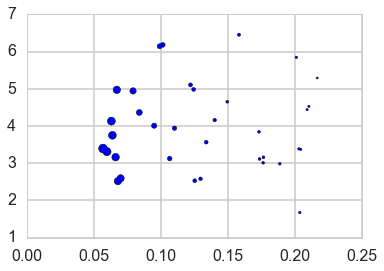

In [42]:
plt.scatter(theo,stds, s=n_polls*10)

In [43]:
    print candidates.R.index

RangeIndex(start=0, stop=35, step=1)


In [44]:
    rep_name = candidates.R.ix

#### Problem 2(c) 

Plot observed versus theoretical (average of the theoretical SDs) with the area of the point proportional to number of polls. How do these compare?

In [22]:
### Your code here ###

** Your answer here: **

#### Problem 2(d)

Repeat Problem 2(c) but include only the most recent polls from the last two months. Do they match better or worse or the same? Can we just trust the theoretical values?

In [23]:
### Your code here ###

** Your answer here: **

#### Problem 2(e)

Create a scatter plot with each point representing one state. Is there one or more races that are outlier in that it they have much larger variabilities than expected ? Explore the original poll data and explain why the discrepancy?

In [ ]:
### Your code here ###

** Your answer here: **

#### Problem 2(f)

Construct confidence intervals for the difference in each race. Use either theoretical or data driven estimates of the standard error depending on your answer to this question. Use the results in Problem 2(e), to justify your choice.


In [ ]:
### Your code here ###

# Problem 3: Prediction and Posterior Probabilities

Perform a Bayesian analysis to predict the probability of Republicans winning in each state then provide a posterior distribution of the number of republicans in the senate.

#### Problem 3(a)

First, we define a Bayesian model for each race. The prior for the difference $\theta$ between republicans and democtrats will be $N(\mu,\tau^2)$. Say before seeing poll data you have no idea who is going to win, what should $\mu$ be? How about $\tau$, should it be large or small? 

\mu should be equal to 0 and \tau large

** Your answer here: **

#### Problem 3(b)

What is the distribution of $d$ conditioned on $\theta$. What is the posterior distribution of $\theta | d$? 

**Hint**: Use normal approximation. 

**Your answer here:**

#### Problem 3(c)

The prior represents what we think before hand. We do not know who is expected to win, so we assume $\mu=0$. For this problem estimate $\tau$ using the observed differences across states (Hint: $\tau$ represents the standard deviation of a typical difference). Compute the posterior mean for each state and plot it against original average. Is there much change? Why or why not? 

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(d)

For each state, report a probabilty of Republicans winning. How does your answer here compare to the other aggregators?

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(e)

Use the posterior distributions in a Monte Carlo simulation to generate election results. In each simulation compute the total number of seats the Republican control. Show a histogram of these results.

In [ ]:
### Your code here ###

## Problem 4

Predict the results for the 2014 Midterm Elections. We will have a three competitions with the terms for scoring entries described above. For both questions below, **explain** or provide commentary on how you arrived at your predictions including code. 

**Hint**: Use election results from 2010, 2012 to build and test models.

#### Problem 4(a)

Predict the number of Republican senators. You may provide an interval. Smallest interval that includes the election day result wins. 

**Note**: we want the total so add the numbers of those that are not up for election.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(b)

Predict the R-D difference in each state. The predictions that minimize the residual sum of squares between predicted and observed differences wins.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(c)

Report a confidence interval for the R-D difference in each state. If the election day result falls outside your confidence interval in more than two states you are eliminated. For those surviving this cutoff, we will add up the size of all confidence intervals and sum. The smallest total length of confidence interval wins. 

**Note**: you can use Bayesian credible intervals or whatever else you want. 

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
